In [19]:
#install kaggle
! pip install -q kaggle

In [20]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prathamra014","key":"d9770406706b2b56b86a477e6bf5acce"}'}

In [21]:
#create a kaggle folder
! mkdir ~/.kaggle

In [22]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/


In [23]:
#Permission for the json to act'
! chmod 600 ~/.kaggle/kaggle.json

In [24]:
#list alll the datasets in kaggle
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           6056        190  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           5410        158  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           2382        112  0.9705882        
paradisejoy/top-hits-spotify-f

In [25]:
! kaggle datasets download -d landlord/handwriting-recognition

100% 1.25G/1.26G [00:16<00:00, 79.8MB/s]
100% 1.26G/1.26G [00:16<00:00, 81.8MB/s]


In [26]:
!unzip handwriting-recognition.zip 

Streaming output truncated to the last 5000 lines.
  inflating: validation_v2/validation/VALIDATION_5003.jpg  
  inflating: validation_v2/validation/VALIDATION_5004.jpg  
  inflating: validation_v2/validation/VALIDATION_5005.jpg  
  inflating: validation_v2/validation/VALIDATION_5006.jpg  
  inflating: validation_v2/validation/VALIDATION_5007.jpg  
  inflating: validation_v2/validation/VALIDATION_5008.jpg  
  inflating: validation_v2/validation/VALIDATION_5009.jpg  
  inflating: validation_v2/validation/VALIDATION_5010.jpg  
  inflating: validation_v2/validation/VALIDATION_5011.jpg  
  inflating: validation_v2/validation/VALIDATION_5012.jpg  
  inflating: validation_v2/validation/VALIDATION_5013.jpg  
  inflating: validation_v2/validation/VALIDATION_5014.jpg  
  inflating: validation_v2/validation/VALIDATION_5015.jpg  
  inflating: validation_v2/validation/VALIDATION_5016.jpg  
  inflating: validation_v2/validation/VALIDATION_5017.jpg  
  inflating: validation_v2/validation/VALIDATION_

In [27]:
!kaggle datasets download -d vaibhao/handwritten-characters

 99% 1.60G/1.62G [00:18<00:00, 170MB/s]
100% 1.62G/1.62G [00:18<00:00, 91.6MB/s]


In [29]:
!unzip handwritten-characters.zip 

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Validation/F/167.jpg  
  inflating: dataset/Validation/F/168.jpg  
  inflating: dataset/Validation/F/169.jpg  
  inflating: dataset/Validation/F/17.jpg  
  inflating: dataset/Validation/F/170.jpg  
  inflating: dataset/Validation/F/171.jpg  
  inflating: dataset/Validation/F/172.jpg  
  inflating: dataset/Validation/F/173.jpg  
  inflating: dataset/Validation/F/174.jpg  
  inflating: dataset/Validation/F/175.jpg  
  inflating: dataset/Validation/F/176.jpg  
  inflating: dataset/Validation/F/177.jpg  
  inflating: dataset/Validation/F/178.jpg  
  inflating: dataset/Validation/F/179.jpg  
  inflating: dataset/Validation/F/18.jpg  
  inflating: dataset/Validation/F/180.jpg  
  inflating: dataset/Validation/F/181.jpg  
  inflating: dataset/Validation/F/182.jpg  
  inflating: dataset/Validation/F/183.jpg  
  inflating: dataset/Validation/F/184.jpg  
  inflating: dataset/Validation/F/185.jpg  
  inflating: dataset/Valida

In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [30]:
dir = "/content/Train"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [31]:
print(train_data[0])

[array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [0, 1, 2, ..., 0, 0, 0]], dtype=uint8), 'F']


In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
len(train_data)

140000

In [34]:
val_dir = "/content/Validation"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [35]:
len(val_data)

15209

In [36]:
random.shuffle(train_data)
random.shuffle(val_data)

In [37]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [38]:

print(train_Y)

['W', 'I', 'C', 'P', 'M', 'X', 'H', 'B', '5', 'A', 'P', 'H', '8', 'C', 'R', 'Y', 'J', 'J', '1', 'V', 'V', 'D', 'H', 'K', 'N', 'K', 'W', '4', 'K', 'M', 'P', 'I', '0', 'M', 'F', 'Q', 'X', 'F', '4', '8', 'J', 'R', 'J', 'E', 'Z', '9', 'H', 'M', 'B', 'U', 'J', '3', 'U', 'C', '6', '2', 'D', '9', 'H', '7', 'M', '8', 'G', 'X', 'T', 'W', 'C', 'J', '9', '6', 'E', 'T', 'N', 'I', 'F', '1', 'H', 'I', 'J', 'K', 'W', 'Z', 'P', 'Q', 'B', 'D', 'W', 'V', 'H', 'J', 'T', 'G', 'F', 'J', '1', 'C', 'R', 'N', 'L', '4', 'E', '5', '4', 'T', 'X', 'C', 'V', 'Z', 'B', 'Z', 'I', 'U', 'D', '8', '0', 'H', 'G', 'B', 'S', 'Q', 'J', '4', '6', '3', '2', 'C', 'X', 'J', '4', 'K', '3', 'L', 'Q', 'L', 'X', 'U', 'B', 'L', 'G', 'D', 'H', 'X', 'A', 'L', '5', '1', '3', '2', 'X', 'Q', 'X', 'A', 'Z', '3', 'A', 'F', 'S', 'Y', 'T', 'T', '5', 'D', 'N', 'X', 'F', 'C', 'C', '5', 'C', 'C', '7', '9', 'I', '6', 'V', '5', '0', 'S', 'X', 'J', 'L', 'L', 'R', 'S', 'U', '3', '4', 'L', '9', 'M', 'J', 'X', 'W', 'M', 'X', 'C', 'F', '6', 'C', 'I',

In [39]:
val_X = []
val_Y = []
for features,label in val_data:
  val_X.append(features)
  val_Y.append(label)

In [40]:
print(val_Y)

['7', '1', 'R', '1', 'A', '6', 'I', 'U', 'G', 'H', '4', '6', '1', '6', 'S', '4', '3', 'F', 'N', 'N', 'H', '2', '0', 'D', 'L', 'R', 'N', 'Q', '6', '2', '4', '0', 'N', '2', '1', 'H', '5', 'L', 'H', '2', 'R', '5', '6', '5', 'Q', '2', '5', 'I', '3', 'D', '9', '2', '2', '1', '8', '9', '5', '1', '8', '6', 'W', 'D', 'D', '9', '0', 'Q', '1', '3', '9', 'I', '2', 'R', '4', '4', '1', '0', '1', '9', '8', 'A', '9', 'T', 'T', 'R', '2', 'U', 'J', '1', '2', 'Q', 'M', 'S', '6', '1', '4', 'P', 'Y', '1', 'L', 'M', 'X', '5', 'I', 'U', 'N', 'V', '9', 'U', '1', '4', '6', 'H', 'I', '4', '8', 'R', 'X', '6', '3', 'Z', 'R', '2', '1', '4', 'V', 'N', '3', 'I', '6', 'R', 'H', 'R', 'Y', '2', 'H', 'F', 'G', 'B', '5', 'A', 'P', '3', '0', '5', 'B', 'E', '2', '4', '3', 'V', 'I', 'K', 'L', '4', 'R', '2', 'U', 'N', '2', 'D', '5', '8', '5', 'B', 'I', 'R', '9', '6', 'F', '3', '1', 'R', 'S', 'K', 'T', '8', 'D', '2', 'B', '3', '8', '6', '9', 'F', '6', '0', 'T', '4', '3', '1', '4', '5', '0', 'N', 'T', 'G', 'Q', 'T', 'N', '5',

In [41]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [42]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [43]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [44]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [45]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [46]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [50]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [51]:
history = model.fit(train_X,train_Y, epochs=10, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
4375/4375 [==============================] - 260s 59ms/step - loss: 0.6076 - accuracy: 0.8066 - val_loss: 0.3267 - val_accuracy: 0.8892
Epoch 2/10
4375/4375 [==============================] - 239s 55ms/step - loss: 0.3406 - accuracy: 0.8854 - val_loss: 0.2668 - val_accuracy: 0.9108
Epoch 3/10
4375/4375 [==============================] - 236s 54ms/step - loss: 0.2978 - accuracy: 0.8984 - val_loss: 0.2917 - val_accuracy: 0.8972
Epoch 4/10
4375/4375 [==============================] - 237s 54ms/step - loss: 0.2752 - accuracy: 0.9061 - val_loss: 0.2713 - val_accuracy: 0.8987
Epoch 5/10
4375/4375 [==============================] - 232s 53ms/step - loss: 0.2559 - accuracy: 0.9106 - val_loss: 0.2196 - val_accuracy: 0.9245
Epoch 6/10
4375/4375 [==============================] - 233s 53ms/step - loss: 0.2432 - accuracy: 0.9150 - val_loss: 0.2671 - val_accuracy: 0.9007
Epoch 7/10
4375/4375 [==============================] - 231s 53ms/step - loss: 0.2348 - accuracy: 0.9172 - val_loss: 0

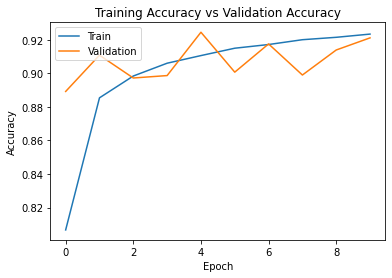

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

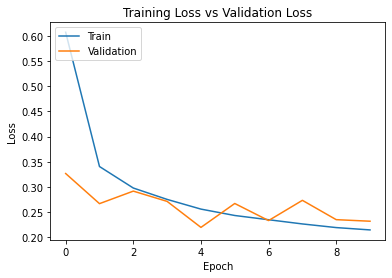

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [54]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    return (cnts, boundingBoxes)

In [55]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image



In [56]:
def get_word(letter):
    word = "".join(letter)
    return word

JFANARDLH


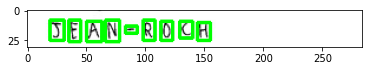

In [71]:
letter,image = get_letters("/content/validation_v2/validation/VALIDATION_0004.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)


RUPP


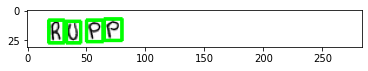

In [58]:
letter,image = get_letters("")
word = get_word(letter)
print(word)
plt.imshow(image)